# Image Recognition for Yoruba Dishes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
import matplotlib.image as mpimg
import numpy as np

import os

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
train.head(10)

,dishes_zones,name_of_dish,file
0,Yoruba,amala,0_0_0001.jpeg
1,Yoruba,amala,0_0_0002.jpeg
2,Yoruba,amala,0_0_0003.jpeg
3,Yoruba,amala,0_0_0004.jpeg
4,Yoruba,amala,0_0_0005.jpeg
5,Yoruba,amala,0_0_0006.jpeg
6,Yoruba,amala,0_0_0007.jpeg
7,Yoruba,amala,0_0_0008.jpeg
8,Yoruba,amala,0_0_0009.jpeg
9,Yoruba,amala,0_0_0010.jpeg


In [3]:
train['file'].iloc[61] = '0_0_0062.jpg'
train['file'].iloc[62] = '0_0_0063.jpg'
train['file'].iloc[63] = '0_0_0064.jpg'

In [4]:
test.head(10)

,dishes_zones,name_of_dish,file
0,Yoruba,amala,0_0_0001.jpeg
1,Yoruba,amala,0_0_0002.jpeg
2,Yoruba,amala,0_0_0003.jpeg
3,Yoruba,amala,0_0_0004.jpeg
4,Yoruba,amala,0_0_0005.jpeg
5,Yoruba,amala,0_0_0006.jpeg
6,Yoruba,amala,0_0_0007.jpeg
7,Yoruba,amala,0_0_0008.jpeg
8,Yoruba,amala,0_0_0009.jpeg
9,Yoruba,amala,0_0_0010.jpeg


In [5]:
print('Train shape is {}'.format(train.shape))
print('Test shape is {}'.format(test.shape))

Train shape is (338, 3)
Test shape is (60, 3)


In [6]:
train['file'].iloc[0]
range(10)

range(0, 10)

In [7]:
os.getcwd()

'./data/Yoruba/' + str(train['file'].iloc[0])

'./data/Yoruba/0_0_0001.jpeg'

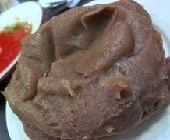

In [8]:
Image.open('./data/Yoruba/0_0_0001.jpeg')

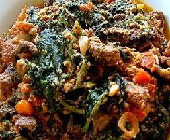

In [9]:
Image.open('./data/Yoruba/0_2_0062.jpeg')

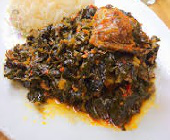

In [10]:
Image.open('./data/Yoruba/0_2_0013.jpeg')

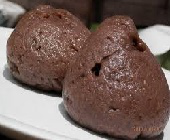

In [11]:
Image.open('./data/Yoruba/0_0_0013.jpeg')

In [12]:
img = mpimg.imread('./data/Yoruba/0_0_0001.jpeg') 
img2 = mpimg.imread('./data/Yoruba/0_0_0002.jpeg') #for getting image data into matrix 
img = np.ravel(img)    #this method for converting it into an array 
img2 = np.ravel(img2)
df = pd.DataFrame([img,img2])

df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,71390,71391,71392,71393,71394,71395,71396,71397,71398,71399
0,178,179,163,178,180,166,183,189,175,186,...,255,187,223,255,190,227,255,190,227,254
1,14,5,0,16,7,2,17,8,3,17,...,5,19,6,0,19,6,0,57,43,34


In [13]:
#define function to get the images and save them as a Dataframe

def get_change(row):
    number = row.shape[0]
    df1 = pd.DataFrame()
    image = []
    #number = 10
    for i in range(number):
        address = row.iloc[i]
        add = './data/Yoruba/' + str(address)
        img = mpimg.imread(add)
        img = np.ravel(img)
        image.append(img)
        
    df1 = pd.DataFrame(image)
    return df1  

In [14]:
#Get the Dataframe for the Train-file     
df2 = get_change(train['file'])

In [15]:
#Get the Dataframe for the Test-file 

df3 = get_change(test['file'])

In [16]:
df3.head(10)

,0,1,2,3,4,5,6,7,8,9,...,71390,71391,71392,71393,71394,71395,71396,71397,71398,71399
0,178,179,163,178,180,166,183,189,175,186,...,255,187,223,255,190,227,255,190,227,254
1,14,5,0,16,7,2,17,8,3,17,...,5,19,6,0,19,6,0,57,43,34
2,230,236,236,229,235,235,229,235,235,230,...,231,222,226,227,230,235,238,228,236,239
3,207,231,235,223,244,249,214,231,238,214,...,67,45,62,70,49,66,73,66,83,90
4,12,16,27,38,42,53,165,169,180,216,...,255,255,255,255,255,255,255,255,255,255
5,222,226,227,222,226,227,222,226,227,222,...,240,232,237,240,232,237,240,232,237,240
6,116,99,81,114,97,81,113,96,80,112,...,254,217,239,253,216,238,252,216,238,252
7,201,192,175,203,194,177,196,187,172,207,...,113,147,128,113,147,128,113,147,128,113
8,177,179,174,177,179,174,178,180,175,179,...,227,225,236,232,216,227,223,212,223,219
9,245,247,244,245,247,244,245,247,246,246,...,253,248,252,253,248,252,253,248,252,253


In [17]:
testi = pd.concat([test,df3], axis=1)
testi = testi.drop(['file','dishes_zones'],axis=1)
testi.head(10)

,name_of_dish,0,1,2,3,4,5,6,7,8,...,71390,71391,71392,71393,71394,71395,71396,71397,71398,71399
0,amala,178,179,163,178,180,166,183,189,175,...,255,187,223,255,190,227,255,190,227,254
1,amala,14,5,0,16,7,2,17,8,3,...,5,19,6,0,19,6,0,57,43,34
2,amala,230,236,236,229,235,235,229,235,235,...,231,222,226,227,230,235,238,228,236,239
3,amala,207,231,235,223,244,249,214,231,238,...,67,45,62,70,49,66,73,66,83,90
4,amala,12,16,27,38,42,53,165,169,180,...,255,255,255,255,255,255,255,255,255,255
5,amala,222,226,227,222,226,227,222,226,227,...,240,232,237,240,232,237,240,232,237,240
6,amala,116,99,81,114,97,81,113,96,80,...,254,217,239,253,216,238,252,216,238,252
7,amala,201,192,175,203,194,177,196,187,172,...,113,147,128,113,147,128,113,147,128,113
8,amala,177,179,174,177,179,174,178,180,175,...,227,225,236,232,216,227,223,212,223,219
9,amala,245,247,244,245,247,244,245,247,246,...,253,248,252,253,248,252,253,248,252,253


In [18]:
#Lets merge the Dataframe

food = pd.concat([train,df2], axis=1)
food = food.drop(['file','dishes_zones'],axis=1)
food.head(10)

,name_of_dish,0,1,2,3,4,5,6,7,8,...,71390,71391,71392,71393,71394,71395,71396,71397,71398,71399
0,amala,178,179,163,178,180,166,183,189,175,...,255,187,223,255,190,227,255,190,227,254
1,amala,14,5,0,16,7,2,17,8,3,...,5,19,6,0,19,6,0,57,43,34
2,amala,230,236,236,229,235,235,229,235,235,...,231,222,226,227,230,235,238,228,236,239
3,amala,207,231,235,223,244,249,214,231,238,...,67,45,62,70,49,66,73,66,83,90
4,amala,12,16,27,38,42,53,165,169,180,...,255,255,255,255,255,255,255,255,255,255
5,amala,222,226,227,222,226,227,222,226,227,...,240,232,237,240,232,237,240,232,237,240
6,amala,116,99,81,114,97,81,113,96,80,...,254,217,239,253,216,238,252,216,238,252
7,amala,201,192,175,203,194,177,196,187,172,...,113,147,128,113,147,128,113,147,128,113
8,amala,177,179,174,177,179,174,178,180,175,...,227,225,236,232,216,227,223,212,223,219
9,amala,245,247,244,245,247,244,245,247,246,...,253,248,252,253,248,252,253,248,252,253


In [19]:
testi.head()

,name_of_dish,0,1,2,3,4,5,6,7,8,...,71390,71391,71392,71393,71394,71395,71396,71397,71398,71399
0,amala,178,179,163,178,180,166,183,189,175,...,255,187,223,255,190,227,255,190,227,254
1,amala,14,5,0,16,7,2,17,8,3,...,5,19,6,0,19,6,0,57,43,34
2,amala,230,236,236,229,235,235,229,235,235,...,231,222,226,227,230,235,238,228,236,239
3,amala,207,231,235,223,244,249,214,231,238,...,67,45,62,70,49,66,73,66,83,90
4,amala,12,16,27,38,42,53,165,169,180,...,255,255,255,255,255,255,255,255,255,255


In [20]:
#Converting our output to Floats
#amala,eba,efo,ewedu,fufu and iyan
def converted(row):
    if row.any() == 'amala':
        return 1
    if row.any() == 'eba':
        return 2
    if row.any() == 'efo':
        return 3
    if row.any() == 'ewedu':
        return 4
    if row.any() == 'fufu':
        return 5
    else:
        return 6

In [21]:
food['food_number'] = food.apply(lambda row: converted(row), axis=1)

In [22]:
testi['food_number'] = testi.apply(lambda row: converted(row), axis=1)

In [23]:
x_train = food.drop(['name_of_dish','food_number'],axis=1)
y_train = food['food_number']

In [24]:
y_train.head(5)

0    1
1    1
2    1
3    1
4    1
Name: food_number, dtype: int64

In [25]:
food.shape[0]

338

In [26]:
print(y_train[100])
range(10)

2


range(0, 10)

In [27]:
x_test = testi.drop(['name_of_dish','food_number'],axis=1)
y_test = testi['food_number']

In [28]:
x_train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,71390,71391,71392,71393,71394,71395,71396,71397,71398,71399
0,178,179,163,178,180,166,183,189,175,186,...,255,187,223,255,190,227,255,190,227,254
1,14,5,0,16,7,2,17,8,3,17,...,5,19,6,0,19,6,0,57,43,34
2,230,236,236,229,235,235,229,235,235,230,...,231,222,226,227,230,235,238,228,236,239
3,207,231,235,223,244,249,214,231,238,214,...,67,45,62,70,49,66,73,66,83,90
4,12,16,27,38,42,53,165,169,180,216,...,255,255,255,255,255,255,255,255,255,255


In [29]:
# Using Scikit Learn

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation='relu',hidden_layer_sizes=(48,64,96,256,512,6),shuffle=True)
mlp.fit(x_train,y_train)

/Users/admin/anaconda3/envs/dsr/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(48, 64, 96, 256, 512, 6),
              learning_rate='constant', learning_rate_init=0.001, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [30]:
predictions = mlp.predict(x_test)

In [31]:
#check result accuracy

results = sum(predictions == y_test)
print(len(predictions))
print(results)

60
10


In [32]:
print(y_train.shape[0])

338


In [33]:
row = y_test
print(row[1])

1


In [34]:
y_test.head(5)

0    1
1    1
2    1
3    1
4    1
Name: food_number, dtype: int64

In [35]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPool2D

batch_size = 256
input_shape = (71400,)
model = Sequential()

model.add(Dense(12, input_shape=input_shape))  #first (input) Layer
model.add(Dense(24,activation='relu')) #first hidden layer
#model.add(Conv2D(32, (3, 3), input_shape=input_shape,
              # activation='relu'))
#model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(Conv2D(32, (3, 3), activation='relu'))
#model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(Flatten())
model.add(Dense(48,activation='relu')) #second hidden layer
model.add(Dense(96,activation='relu')) #fourth hidden layer

model.add(Dense(7,activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train,y_train,epochs=10,batch_size = batch_size,validation_data=(x_test, y_test))

Using TensorFlow backend.


Train on 338 samples, validate on 60 samples
Epoch 1/10
338/338 [==============================] - 1s 2ms/step - loss: 412.4927 - accuracy: 0.0651 - val_loss: 2223.0593 - val_accuracy: 0.1667
Epoch 2/10
338/338 [==============================] - 0s 1ms/step - loss: 2570.8246 - accuracy: 0.1775 - val_loss: 2270.2102 - val_accuracy: 0.1667
Epoch 3/10
338/338 [==============================] - 0s 1ms/step - loss: 2601.2416 - accuracy: 0.1716 - val_loss: 1377.5114 - val_accuracy: 0.2000
Epoch 4/10
338/338 [==============================] - 0s 1ms/step - loss: 1763.3633 - accuracy: 0.2130 - val_loss: 2111.8367 - val_accuracy: 0.1667
Epoch 5/10
338/338 [==============================] - 0s 1ms/step - loss: 2392.5791 - accuracy: 0.1213 - val_loss: 1516.2733 - val_accuracy: 0.1667
Epoch 6/10
338/338 [==============================] - 0s 1ms/step - loss: 1466.3218 - accuracy: 0.1450 - val_loss: 925.5001 - val_accuracy: 0.1667
Epoch 7/10
338/338 [==============================] - 0s 1ms/step - l

In [36]:
accuracy = sum(predictions == y_test)
print(accuracy)
Percentage = (int(accuracy)/int(len(y_test)))*100
print(Percentage)

over_all = {'predictions':predictions,'actual_result':y_test}
over_all_df = pd.DataFrame(over_all)
over_all_df.head(20)

10
16.666666666666664


,predictions,actual_result
0,6,1
1,6,1
2,6,1
3,6,1
4,6,1
5,6,1
6,6,1
7,6,1
8,6,1
9,6,1


In [37]:
y_test1 = testi['name_of_dish']
y_train1 = food['name_of_dish']

In [38]:
#Lets use K_nearest Neighbours

from sklearn.neighbors import KNeighborsClassifier
nbrs = KNeighborsClassifier(n_neighbors=1)
nbrs.fit(x_train,y_train1)

predictions1 = nbrs.predict(x_test)

In [39]:
accuracy1 = sum(predictions1 == y_test1)
print(accuracy1)
Percentage1 = (int(accuracy1)/int(len(y_test)))*100
print(Percentage1)

over_all1 = {'predictions':predictions1,'actual_result':y_test1}
over_all1_df = pd.DataFrame(over_all1)
over_all1_df.head(20)

60
100.0


,predictions,actual_result
0,amala,amala
1,amala,amala
2,amala,amala
3,amala,amala
4,amala,amala
5,amala,amala
6,amala,amala
7,amala,amala
8,amala,amala
9,amala,amala


In [ ]:
#Building a Deeper and More Structured Algorithm
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('./data/Yoruba/',target_size=(170,140),
                                                batch_size=32,class_mode='binary')
test_set = train_datagen.flow_from_directory('./data/Yoruba/',target_size=(170,140),
                                                batch_size=32,class_mode='binary')

mode = Sequential()
mode.add(Conv2D(32,3,3, input_shape=(170,140,3), activation = 'relu'))  #first (input) Layer
mode.add(MaxPool2D(pool_size=(2,2)))
mode.add(Flatten())

mode.add(Dense(128,activation='relu')) #fourth hidden layer

mode.add(Dense(7,activation='softmax'))
mode.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

mode.fit_generator(training_set,epochs=10,validation_data=test_set,steps_per_epoch=800,validation_steps=80)

In [ ]:
test